# Characteristics and skill sets required as put in the job postings

In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd
%matplotlib inline


In [2]:
df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['RequiredQual'])
print(df.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(16689, 24)
Removed 2312 duplicates (based on RequiredQual)


In [3]:
df["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [4]:
df["RequiredQual"] = df["RequiredQual"].astype(str)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df['RequiredQual_token'] = df['RequiredQual'].map(word_tokenize)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
df.RequiredQual_token.head()

0    [To, perform, this, job, successfully, ,, an, ...
1    [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
2    [-, Degree, in, environmentally, related, fiel...
3    [-, Advanced, degree, in, public, health, ,, s...
4    [-, University, degree, ;, economical, backgro...
Name: RequiredQual_token, dtype: object

In [7]:
df.RequiredQual_token[0][:10]


['To',
 'perform',
 'this',
 'job',
 'successfully',
 ',',
 'an',
 'individual',
 'must',
 'be']

In [8]:
df['RequiredQual_len'] = df.RequiredQual_token.apply(len)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.RequiredQual_len.head()

0    455
1     61
2     47
3    112
4     63
Name: RequiredQual_len, dtype: int64

So on average, each word is used 1.5 - 2.5 times in each job posting. 

## Preprocessing Function for All Rows

In [10]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [11]:
df['RequiredQual_processed'] = df.RequiredQual_token.apply(preprocess)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['RequiredQual_processed'].head()

0    [perform, job, successfully, individual, must,...
1    [bachelor, degree, master, preferred, excellen...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: RequiredQual_processed, dtype: object

## Get Feature Matrix

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
df['RequiredQual_processedtext'] = df.RequiredQual_processed.apply(lambda x: ' '.join(x))

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
vec_tf = CountVectorizer(min_df=2)
required_qual_tf = vec_tf.fit_transform(df['RequiredQual_processedtext'])
print(required_qual_tf.shape)


(16689, 6848)


In [15]:
print(required_qual_tf.toarray())
required_qual_feature_names = (vec_tf.get_feature_names())
required_qual_feature_names[:10]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


['00', '000', '04', '10', '100', '1000', '10g', '11', '11g', '12']

In [16]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
required_qual_tfidf = vec_tfidf.fit_transform(df['RequiredQual_processedtext'])
print(required_qual_tfidf.shape)

(16689, 5591)


In [17]:
 # To save the vectorized results for future use
import pickle

pickle.dump(required_qual_tfidf, open("outputs/required_qual_tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("outputs/required_qual_tfidf_features.pkl", "wb"))


In [18]:
# load the content
# loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = pickle.load(open("./tfidf.pkl", "rb"))
# print(tfidf)

## Clustering Try 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(1500)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(required_qual_tfidf)

In [20]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 89%


In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 7

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

Wall time: 6.29 s
Clusters: 7
Silhouette Coefficient for clusters: 0.013


In [22]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)


Cluster 0: net sql web development good server javascript database html php
Cluster 1: ability management work degree year good excellent project field armenian
Cluster 2: higher education work russian excellent armenian good computer field ability
Cluster 3: accounting finance armenian tax work financial legislation good excellent standard
Cluster 4: marketing sale business excellent ability work russian communication strong degree
Cluster 5: development testing software design good programming ability plus tool linux
Cluster 6: work excellent ability armenian russian good university communication degree strong


Any pattern here between the clusters? 

In [23]:
df["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [24]:
df["date"].head()

0     Jan 5, 2004
1     Jan 7, 2004
2     Jan 7, 2004
3     Jan 7, 2004
4    Jan 10, 2004
Name: date, dtype: object

In [25]:
def get_year_from_date_if_exists(date_str):
    year_str = date_str.strip()[-4:]
    for c in year_str:
        if c.isalpha():
            return "0"
    
    return year_str

df["year"] = df["date"].apply(get_year_from_date_if_exists)
df["year"].head()

G:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    2004
1    2004
2    2004
3    2004
4    2004
Name: year, dtype: object

In [26]:
df = df[df["year"] != "0"]

In [27]:
df["year"].head()

0    2004
1    2004
2    2004
3    2004
4    2004
Name: year, dtype: object

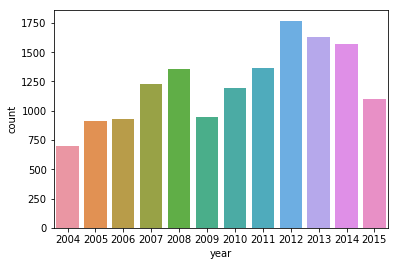

In [28]:
import seaborn as sns
ax = sns.countplot(x="year", data=df)
ax

In [29]:
def set_group_by_year(year):
    year = int(year)
    if year >= 2004 and year <= 2007:
        return 1
    elif year >= 2008 and year <= 2011:
        return 2
    else:
        return 3
    
df["year_group"] = df["year"].apply(set_group_by_year)

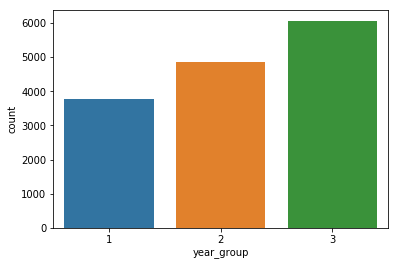

In [30]:
ax = sns.countplot(x="year_group", data=df)
ax

In [31]:
df1 = df[df["year_group"] == 1]
df2 = df[df["year_group"] == 2]
df3 = df[df["year_group"] == 3]

In [44]:
# For each data frame create the TF_IDF matrix, perform SVD decomposition and then KMeans cluster
year_wise_dfs = [df1, df2, df3]
CLUSTERS = 6
clustered_data = []

for idx, year_wise_df in enumerate(year_wise_dfs):
    print("Year group: {0}".format(idx))
    
    # create the TF-IDF matrix
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
    required_qual_tfidf = vec_tfidf.fit_transform(year_wise_df['RequiredQual_processedtext'])
    
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(1000)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(required_qual_tfidf)
    
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    
    # KMeans clustering
    km = KMeans(n_clusters=CLUSTERS, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    km.fit(X_lsa)
    
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(CLUSTERS))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km.labels_))
    
    clustered_data.append(km)
    
    print_terms(km, CLUSTERS)

Year group: 0
Explained variance of the SVD step: 93%
Clusters: 6
Silhouette Coefficient for clusters: 0.014
Cluster 0: design photoshop adobe draw corel desired ability work web html
Cluster 1: accounting finance financial armenian standard software tax work good skill
Cluster 2: skill year degree work ability management field university relevant good
Cluster 3: development sql programming software net server system web java work
Cluster 4: higher education work skill excellent russian armenian good field computer
Cluster 5: skill excellent work ability armenian good communication russian computer university
Year group: 1
Explained variance of the SVD step: 91%
Clusters: 6
Silhouette Coefficient for clusters: 0.015
Cluster 0: net web sql development database javascript server good html php
Cluster 1: work ability excellent russian university armenian degree communication strong good
Cluster 2: accounting finance good armenian banking work software legislation standard year
Cluster 3: 

In [45]:
clustered_data[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [47]:
import numpy as np
for cd in clustered_data:
    labels, counts = np.unique(cd.labels_, return_counts=True)
    print(counts)
    total_count = np.sum(counts)
    print(total_count)
    
    count_ratio = (1/total_count) * counts
    print(labels)
    print(count_ratio)

[ 256  332 1251  499  484  946]
3768
[0 1 2 3 4 5]
[0.06794055 0.0881104  0.33200637 0.132431   0.12845011 0.25106157]
[ 361 1220  435 1369  796  679]
4860
[0 1 2 3 4 5]
[0.07427984 0.25102881 0.08950617 0.28168724 0.16378601 0.13971193]
[ 283 1569 1127 1385  703  999]
6066
[0 1 2 3 4 5]
[0.04665348 0.2586548  0.18578965 0.22832179 0.11589186 0.16468843]
